In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd 
import matplotlib.pyplot as plt

In [2]:
fp2 = '/Users/adhyadagar/Downloads/maps-master/Districts/Census_2011/2011_Dist.shp'
map_df2 = gpd.read_file(fp2)
df = pd.read_excel('/Users/adhyadagar/Desktop/Labels.xlsx')


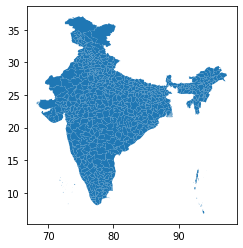

In [3]:
map_df2.plot()

In [4]:
map_df2

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."
...,...,...,...,...,...,...
636,Tapi,Gujarat,24,26,493,"POLYGON ((74.08573 21.55513, 74.08672 21.55515..."
637,Nicobar,Andaman & Nicobar Island,35,1,638,"MULTIPOLYGON (((93.84861 7.24051, 93.84870 7.2..."
638,South Andaman,Andaman & Nicobar Island,35,3,640,"MULTIPOLYGON (((92.69758 12.23961, 92.69778 12..."
639,North & Middle Andaman,Andaman & Nicobar Island,35,2,639,"MULTIPOLYGON (((92.89905 12.91512, 92.89905 12..."


In [5]:
map_df2['censuscode']

0      532
1      146
2      474
3      522
4      283
      ... 
636    493
637    638
638    640
639    639
640    587
Name: censuscode, Length: 641, dtype: int64

In [6]:
map_df2['District_Code'] = map_df2['censuscode']

In [7]:
data_df = pd.merge(map_df2, df, how='left', on='District_Code')

In [8]:
data_df['EA_Label'].fillna(value='No data', inplace=True)

In [9]:
keys = list(data_df['EA_Label'].unique())

In [10]:
color_range = list(np.linspace(0, 1, len(keys), endpoint=False))

In [11]:
import matplotlib.cm as cm
colors = [cm.tab20b(x) for x in color_range]
color_dict = dict(zip(keys, colors))
color_dict['No data'] = 'lightgray'

In [12]:
row_count = data_df['EA_Label'].nunique()
ax_list = []
for i in range(row_count+1):
    ax_list.append('ax' + str(i+1))
ax_string = ','.join(ax_list)

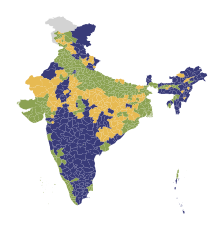

In [14]:
ax1 = plt.subplot2grid((row_count,4),(0,1), rowspan=row_count, colspan=10)
for index, row in data_df.iterrows():
    plot2 = data_df[data_df['censuscode'] == row['censuscode']].plot(color=color_dict[row['EA_Label']], ax=ax1)
    ax1.axis('off')
#plot2.savefig("map_exportt.png", dpi=300)

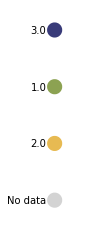

In [15]:
row_counter = 0
for i in data_df['EA_Label'].unique(): 
    plt.subplot2grid((row_count,4),(row_counter,0))
    plt.pie([1],labels=[i],radius=0.4, colors=[color_dict[i]])
    plt.axis('off')
    row_counter += 1